In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
 

In [5]:
file_path ="/Users/mayurimamdi/Documents/HotelBooking/HotelBookingSystem/data/processed/hotel_bookings_cleaned.csv"

In [6]:
df=pd.read_csv(file_path)

In [7]:
df.shape

(87396, 32)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87395 entries, 0 to 87395
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87395 non-null  object 
 1   is_canceled                     87395 non-null  int64  
 2   lead_time                       87395 non-null  int64  
 3   arrival_date_year               87395 non-null  int64  
 4   arrival_date_month              87395 non-null  object 
 5   arrival_date_week_number        87395 non-null  int64  
 6   arrival_date_day_of_month       87395 non-null  int64  
 7   stays_in_weekend_nights         87395 non-null  int64  
 8   stays_in_week_nights            87395 non-null  int64  
 9   adults                          87395 non-null  int64  
 10  children                        87395 non-null  float64
 11  babies                          87395 non-null  int64  
 12  meal                            87395

Here the Children and agent should be in integer and the reservation status date should be in datetime type

In [31]:
df['children'] = df['children'].astype(int)


In [33]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [35]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

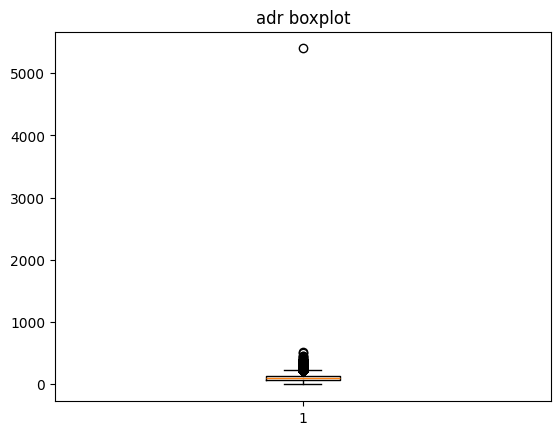

In [10]:
plt.boxplot(df["adr"])
plt.title('adr boxplot')
plt.show()

In [11]:
df['adr'].describe()

count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [14]:
df[df["adr"] > 500].shape


(3, 32)

Remove negative ADR

In [15]:
df=df[df['adr']>=0]

In [25]:
Q1 = df["adr"].quantile(0.25)
Q3 = df["adr"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_iqr = df[(df["adr"] >= lower) & (df["adr"] <= upper)]


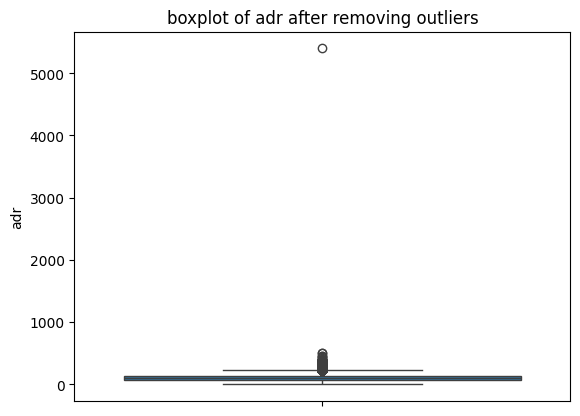

In [36]:
sns.boxplot(df['adr'])
plt.title('boxplot of adr after removing outliers')
plt.show()

In [40]:
df[df["adr"] > 1000].shape


(1, 32)

LETS CHECK THE ROW FOR THAT OUTLIER

In [42]:
df[df['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
38749,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,No Corporate Booking,0,Transient,5400.0,0,0,Canceled,2016-02-19


Since there is just one entry out of so many,

It does seem like an outlier, so lets do winsorization

In [16]:
df['adr'].describe()

count    87395.000000
mean       106.338536
std         55.012947
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

In [43]:
adr_cap=df['adr'].quantile(0.99)
df["adr"] = df["adr"].clip(upper=adr_cap)

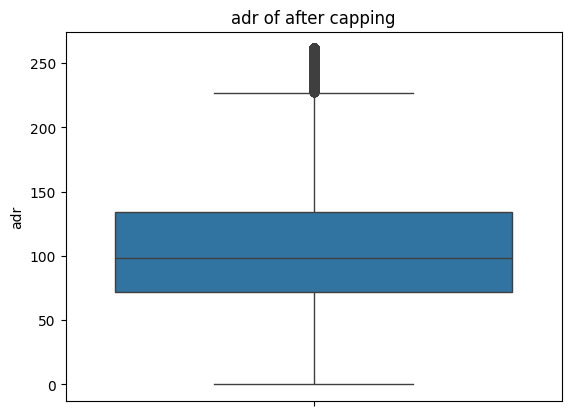

In [44]:
sns.boxplot(df['adr'])
plt.title('adr of after capping')
plt.show()

In [17]:
df['arrival_date_day_of_month'].describe()

count    87395.000000
mean        15.815665
std          8.835121
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64

In [18]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    42391
2017    31691
2015    13313
Name: count, dtype: int64

In [19]:
df['booking_changes'].describe()

count    87395.000000
mean         0.271583
std          0.727226
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: booking_changes, dtype: float64

In [23]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    43893
1    29017
2    11812
3     2317
4      320
5       36
Name: count, dtype: int64

In [24]:
df['assigned_room_type'].value_counts()

assigned_room_type
A    46313
D    22432
E     7195
F     3627
G     2498
C     2165
B     1820
H      705
I      357
K      276
P        6
L        1
Name: count, dtype: int64

In [27]:
df['arrival_date_month'].value_counts()


arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7512
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64

In [45]:
df.to_csv("../data/processed/hotel_bookings_cleaned.csv", index=False)


Check other features for outlier 

In [47]:
df['adults'].value_counts()

adults
2     64496
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [49]:
df['agent'].value_counts()

agent
9.0               28759
240.0             13028
Direct Booking    12193
14.0               3349
7.0                3300
                  ...  
257.0                 1
291.0                 1
93.0                  1
483.0                 1
449.0                 1
Name: count, Length: 334, dtype: int64

In [50]:
df['arrival_date_day_of_month'].value_counts()

arrival_date_day_of_month
17    3020
2     3016
26    3000
5     2979
16    2959
19    2949
12    2929
28    2929
18    2924
11    2915
20    2915
27    2902
29    2880
9     2878
15    2869
25    2838
3     2834
21    2823
13    2812
8     2809
6     2805
4     2801
10    2785
23    2776
24    2775
30    2772
1     2770
7     2704
14    2693
22    2601
31    1733
Name: count, dtype: int64

In [51]:
df['arrival_date_week_number'].value_counts()

arrival_date_week_number
33    2793
34    2491
32    2449
28    2344
30    2335
31    2287
29    2197
27    2166
35    2105
18    2089
21    2044
15    1989
17    1878
23    1872
20    1843
13    1818
19    1813
25    1786
22    1753
24    1746
26    1739
16    1737
14    1693
41    1663
11    1658
38    1635
7     1630
10    1629
36    1626
43    1605
39    1590
9     1579
12    1573
44    1550
8     1525
37    1474
42    1445
40    1427
53    1423
45    1315
6     1299
47    1289
48    1199
49    1170
46    1141
4     1125
5     1101
52    1061
50    1053
3     1050
2      945
1      862
51     786
Name: count, dtype: int64

In [52]:
df['booking_changes'].value_counts()

booking_changes
0     71494
1     10902
2      3507
3       875
4       356
5       116
6        59
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: count, dtype: int64

In [54]:
df['company'].value_counts()

company
No Corporate Booking    82136
40.0                      851
223.0                     503
45.0                      238
153.0                     206
                        ...  
96.0                        1
76.0                        1
184.0                       1
54.0                        1
402.0                       1
Name: count, Length: 353, dtype: int64

In [55]:
df['days_in_waiting_list'].value_counts()

days_in_waiting_list
0      86535
63        53
87        25
44        23
15        22
       ...  
79         1
120        1
160        1
85         1
36         1
Name: count, Length: 128, dtype: int64

In [56]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    86250
Non Refund     1038
Refundable      107
Name: count, dtype: int64

In [58]:
df['stays_in_weekend_nights'].value_counts()

stays_in_weekend_nights
0     35151
2     26414
1     22657
4      1733
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64

In [59]:
df['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0     83851
1      1482
2       579
3       331
4       228
      ...  
47        1
49        1
50        1
51        1
72        1
Name: count, Length: 73, dtype: int64

In [60]:
df['previous_cancellations'].value_counts()	

previous_cancellations
0     85710
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: count, dtype: int64

LETS SEE WHICH HOTEL HAS MOST OF THE CANCELLATIONS

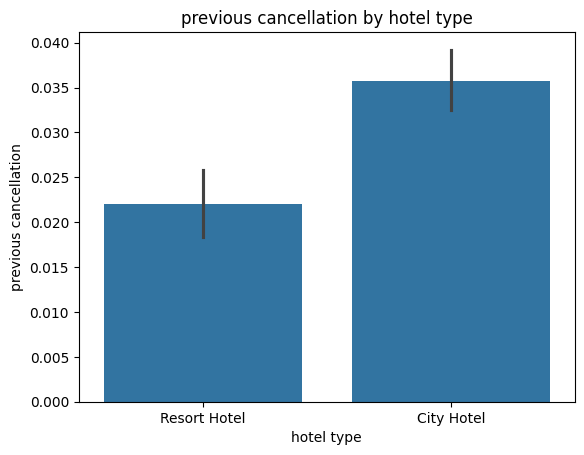

In [88]:
sns.barplot(x='hotel', y='previous_cancellations', data = df)
plt.title("previous cancellation by hotel type")
plt.xlabel("hotel type")
plt.ylabel("previous cancellation")
plt.show()

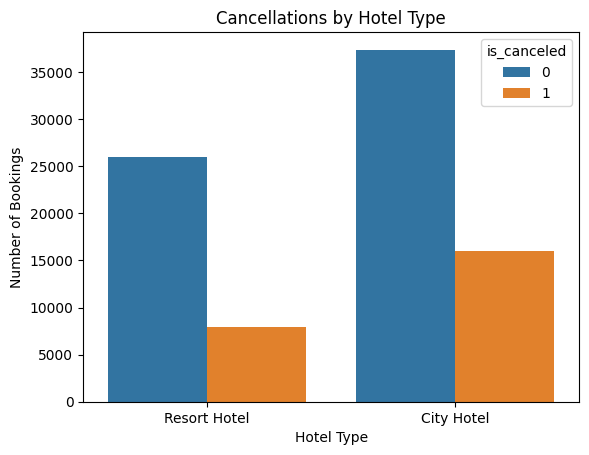

In [78]:
sns.countplot(x="hotel",  hue="is_canceled", data=df)
plt.title("Cancellations by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()


In [83]:
df['adr'].value_counts()

adr
0.000      1778
75.000     1320
65.000     1260
48.000      878
261.406     874
           ... 
46.570        1
31.600        1
55.110        1
33.650        1
157.710       1
Name: count, Length: 8528, dtype: int64

In [84]:
df_2015 = df[df["arrival_date_year"] == 2015]


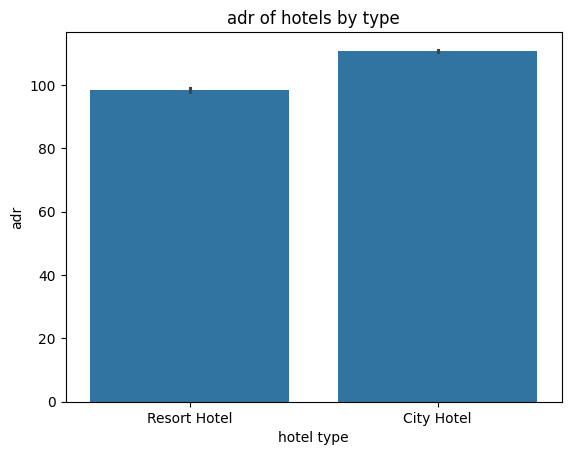

In [85]:
sns.barplot(x=df['hotel'], y=df['adr'], data=df_2015)
plt.title("adr of hotels by type")
plt.xlabel("hotel type")
plt.ylabel("adr")
plt.show()

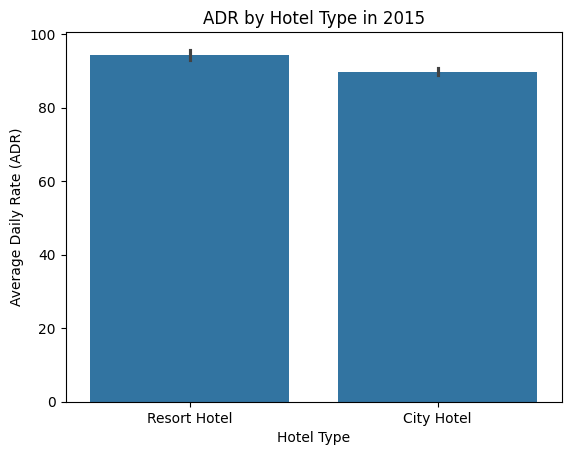

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="hotel", y="adr", data=df_2015)
plt.title("ADR by Hotel Type in 2015")
plt.xlabel("Hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()


So resort hotel has more ADR